# Assignment demo (Solution)
----------


This assignment is to perform data exploration of the [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) provided in [scikit-learn](https://scikit-learn.org/stable/index.html).

### 1. Explore the dataset
  - What is the number of features?
  - What are the (min, max and mean) values for each feature?
  - What is the number of targets?

### 2.  Plot the feature distribution and class distribution using [Matplotlib](https://matplotlib.org/)


In [ ]:
# import
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

In [ ]:
# Load the wine data
wines = load_wine(as_frame=True)

# Peek into the contents of loaded data
for key,value in wines.items():
  print(key)

data
target
frame
target_names
DESCR
feature_names


In [ ]:
# Check out what 'data' did we just load
wines['data']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
# A Statistician's view of the data
wines['data'].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# What do we want to predict
wines['target']

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [ ]:
# How many categories, what are the names
print(wines['target_names'])
print(wines['target'].unique())

['class_0' 'class_1' 'class_2']
[0 1 2]


In [ ]:
# Get feature names in a list
f_names = wines['feature_names']
f_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

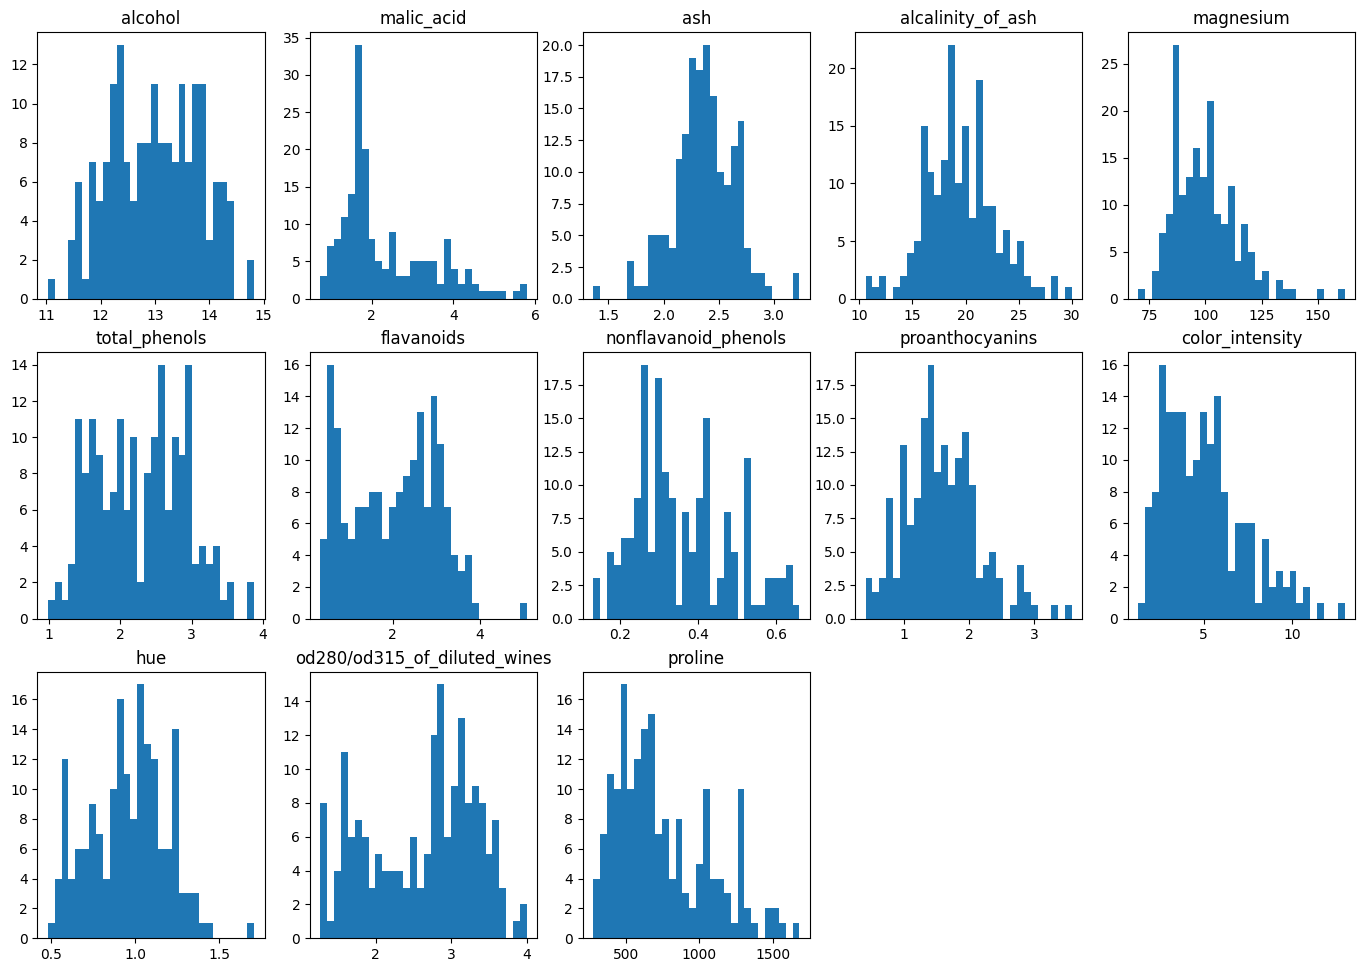

In [ ]:
# Plot 1
fig, axs = plt.subplots(3, 5, figsize=(17,12), dpi=100)

# Delete the axes we dont use
fig.delaxes(axs[2,3])
fig.delaxes(axs[2,4])

# Plot the distribution of features
for i, ax in enumerate(fig.axes):
  ax.hist(wines['data'][f_names[i]], bins=30)
  ax.set_title(f"{f_names[i]}")

In [ ]:
# Since wines['target'] is a dataframe
#wines['target']
#print(type(wines['target']))

targets = np.array(wines['target'])

counts = [np.sum(targets==i) for i in range(3)] # Range takes in 0, 1, 2
print("Count:", counts)

# # Convert counts to percentages
percents = [round(100*i/np.sum(counts),2) for i in counts]
print("Percentage:", percents)

Count: [59, 71, 48]
Percentage: [33.15, 39.89, 26.97]


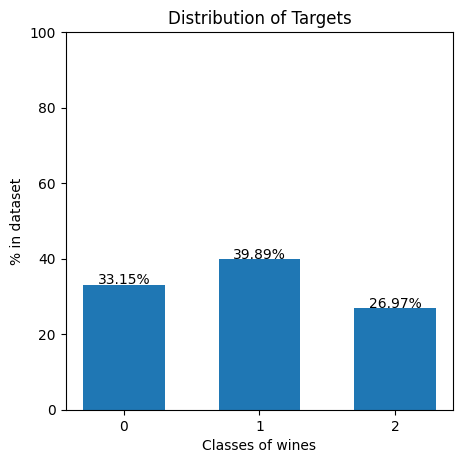

In [ ]:
# Plot 2

fig, ax = plt.subplots(figsize=(5,5), dpi = 100)
ax_1 = ax.bar(range(3), percents, width = 0.6)

ax.set_ylim([0,100]) # Since we deal in percentages we want the y bar to be at 100% max
ax.set_xlabel("Classes of wines")
ax.set_ylabel("% in dataset")

ax.set_title("Distribution of Targets")

# Some neat code to display percentage on top of each bar
for p in ax_1:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
    
x_axis = np.array([0,1,2]).astype(int)
ax.set_xticks(x_axis);